# Calculate PCA on `mtcars` data

PCA works best with numerical data, you'll exclude the two categorical variables (vs and am). You are left with a matrix of 9 columns and 32 rows, which you pass to the prcomp() function, assigning your output to mtcars.pca. You will also set two arguments, center and scale, to be TRUE. Then you can have a peek at your PCA object with `summary()`

In [11]:
mtcars.pca <- prcomp(mtcars[,c(1:7,10,11)], center = TRUE,scale. = TRUE)

`center = TRUE`: variables should be shifted to be zero centered

`scale = TRUE`:  whether the variables should be scaled to have unit variance before the analysis takes place

Let's examine what we have inside the PCA:

In [12]:
summary(mtcars.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2,3782 1,4429 0,71008 0,51481 0,42797 0,35184 0,32413
Proportion of Variance 0,6284 0,2313 0,05602 0,02945 0,02035 0,01375 0,01167
Cumulative Proportion  0,6284 0,8598 0,91581 0,94525 0,96560 0,97936 0,99103
                          PC8     PC9
Standard deviation     0,2419 0,14896
Proportion of Variance 0,0065 0,00247
Cumulative Proportion  0,9975 1,00000

You obtain 9 principal components, which you call PC1-9. Each of these explains a percentage of the total variation in the dataset. That is to say: PC1 explains 63% of the total variance, which means that nearly two-thirds of the information in the dataset (9 variables) can be encapsulated by just that one Principal Component. PC2 explains 23% of the variance. So, by knowing the position of a sample in relation to just PC1 and PC2, you can get a very accurate view on where it stands in relation to other samples, as just PC1 and PC2 can explain 86% of the variance.

Let's plot the pca:

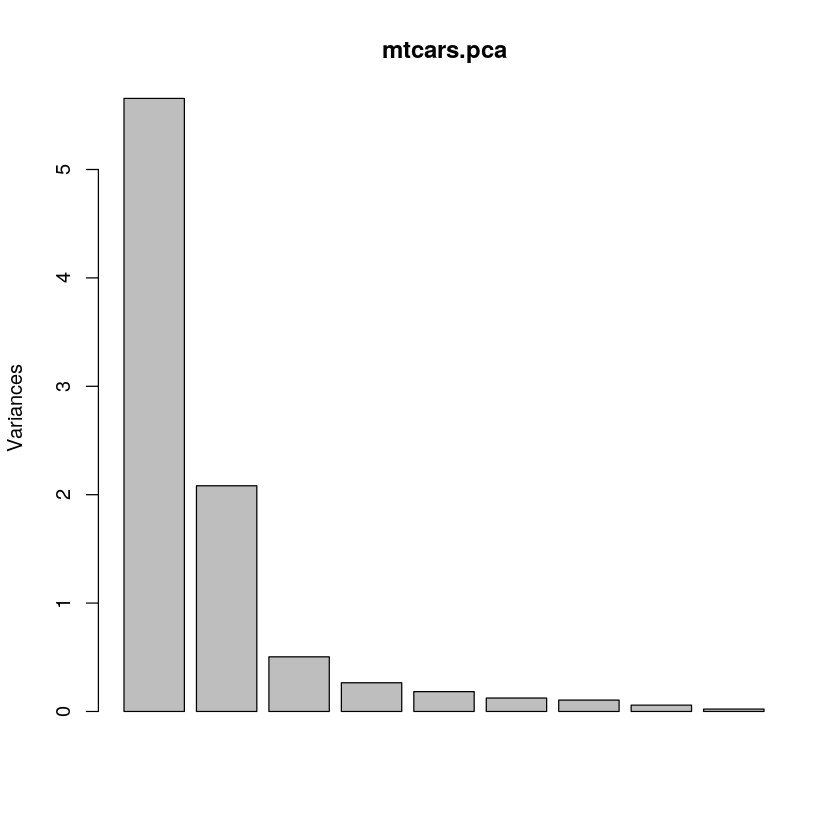

In [5]:
plot(mtcars.pca)

Scree plot:

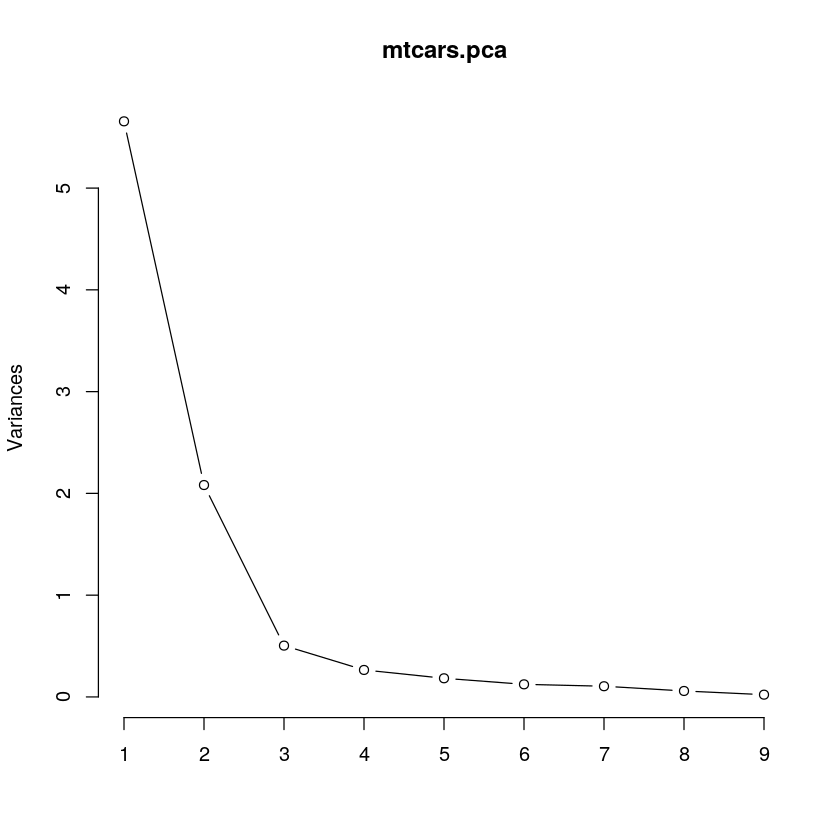

In [7]:
plot(mtcars.pca, type = "l")

In [15]:
am_classes <- factor(mtcars$am)

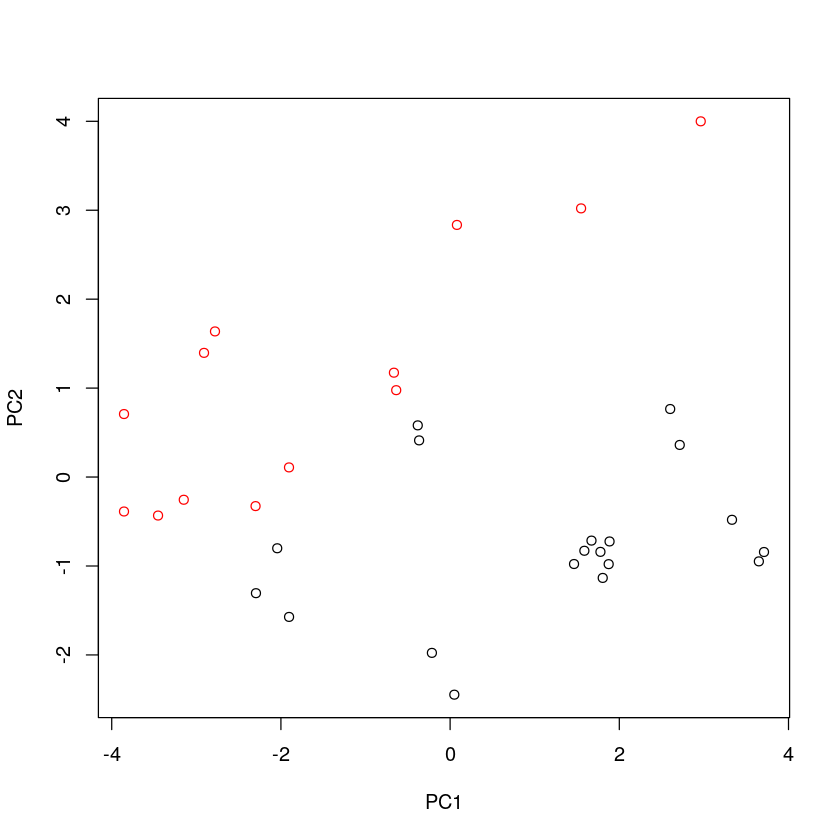

In [20]:
plot(mtcars.pca$x[,1:2], col = am_classes)

Example of regression

In [21]:
mtcars.pca2 <- prcomp(mtcars[,c(2:7,10,11)], center = TRUE,scale. = TRUE)

In [22]:
summary(mtcars.pca2)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2,1921 1,4423 0,69434 0,51480 0,41808 0,33026 0,24457
Proportion of Variance 0,6007 0,2600 0,06026 0,03313 0,02185 0,01363 0,00748
Cumulative Proportion  0,6007 0,8607 0,92094 0,95407 0,97591 0,98955 0,99702
                           PC8
Standard deviation     0,15428
Proportion of Variance 0,00298
Cumulative Proportion  1,00000

In [24]:
mtcars.lm1 <- lm(mtcars$mpg ~ mtcars.pca2$x[,1] + mtcars.pca2$x[,1])

In [27]:
summary(mtcars.lm1)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = mtcars$mpg ~ mtcars.pca2$x[, 1] + mtcars.pca2$x[, 
    1])

Residuals:
    Min      1Q  Median      3Q     Max 
-3,7042 -1,5998 -0,5269  1,3520  5,7864 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         20,0906     0,4547   44,18  < 2e-16 ***
mtcars.pca2$x[, 1]  -2,4953     0,2108  -11,84 7,81e-13 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 2,572 on 30 degrees of freedom
Multiple R-squared:  0,8237,	Adjusted R-squared:  0,8178 
F-statistic: 140,2 on 1 and 30 DF,  p-value: 7,814e-13


In [32]:
mtcars.lm2 <- lm(mpg ~ ., data = mtcars)

In [33]:
summary(mtcars.lm2)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3,4506 -1,6044 -0,1196  1,2193  4,6271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 12,30337   18,71788   0,657   0,5181  
cyl         -0,11144    1,04502  -0,107   0,9161  
disp         0,01334    0,01786   0,747   0,4635  
hp          -0,02148    0,02177  -0,987   0,3350  
drat         0,78711    1,63537   0,481   0,6353  
wt          -3,71530    1,89441  -1,961   0,0633 .
qsec         0,82104    0,73084   1,123   0,2739  
vs           0,31776    2,10451   0,151   0,8814  
am           2,52023    2,05665   1,225   0,2340  
gear         0,65541    1,49326   0,439   0,6652  
carb        -0,19942    0,82875  -0,241   0,8122  
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 2,65 on 21 degrees of freedom
Multiple R-squared:  0,869,	Adjusted R-squared:  0,8066 
F-statistic: 13,93 on 10 and 21 DF,  p-value: 3,793e-07

In [28]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,"21,0",6,"160,0",110,"3,90","2,620","16,46",0,1,4,4
Mazda RX4 Wag,"21,0",6,"160,0",110,"3,90","2,875","17,02",0,1,4,4
Datsun 710,"22,8",4,"108,0",93,"3,85","2,320","18,61",1,1,4,1
Hornet 4 Drive,"21,4",6,"258,0",110,"3,08","3,215","19,44",1,0,3,1
Hornet Sportabout,"18,7",8,"360,0",175,"3,15","3,440","17,02",0,0,3,2
Valiant,"18,1",6,"225,0",105,"2,76","3,460","20,22",1,0,3,1
Duster 360,"14,3",8,"360,0",245,"3,21","3,570","15,84",0,0,3,4
Merc 240D,"24,4",4,"146,7",62,"3,69","3,190","20,00",1,0,4,2
Merc 230,"22,8",4,"140,8",95,"3,92","3,150","22,90",1,0,4,2
Merc 280,"19,2",6,"167,6",123,"3,92","3,440","18,30",1,0,4,4


In [36]:
houses <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",header = F, na.string = "?")
colnames(houses) <- c("CRIM", "ZN", "INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV")

In [37]:
head(houses)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
"0,00632",18,"2,31",0,"0,538","6,575","65,2","4,0900",1,296,"15,3","396,90","4,98","24,0"
"0,02731",0,"7,07",0,"0,469","6,421","78,9","4,9671",2,242,"17,8","396,90","9,14","21,6"
"0,02729",0,"7,07",0,"0,469","7,185","61,1","4,9671",2,242,"17,8","392,83","4,03","34,7"
"0,03237",0,"2,18",0,"0,458","6,998","45,8","6,0622",3,222,"18,7","394,63","2,94","33,4"
"0,06905",0,"2,18",0,"0,458","7,147","54,2","6,0622",3,222,"18,7","396,90","5,33","36,2"
"0,02985",0,"2,18",0,"0,458","6,430","58,7","6,0622",3,222,"18,7","394,12","5,21","28,7"


# KMeans

## mtcars

In [49]:
mtcars.new <- mtcars[,1:3]

In [50]:
head(mtcars.new)

,mpg,cyl,disp
Mazda RX4,"21,0",6,160
Mazda RX4 Wag,"21,0",6,160
Datsun 710,"22,8",4,108
Hornet 4 Drive,"21,4",6,258
Hornet Sportabout,"18,7",8,360
Valiant,"18,1",6,225


Apply kmeans

In [52]:
mtcars.cluster <- kmeans(mtcars.new, 2)

Check the size of clusters

In [53]:
mtcars.cluster$size

[1] 15 17

Check the centers

In [55]:
mtcars.cluster$centers

mpg,cyl,disp
"15,52000","7,866667","346,7600"
"24,12353","4,705882","128,3353"


Cluster vector showing the custer where each record falls

In [56]:
mtcars.cluster$cluster

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  2                   2                   2                   1 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  1                   2                   1                   2 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  2                   2                   2                   1 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                  1                   1                   1                   1 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                  1                   2                   2                   2 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
                  2                   1                   1                   1 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
                  1                   2                   2                   2 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
                  1                   2                   1                   2

Check classification errors.

In [57]:
table(mtcars.cluster$cluster,mtcars$am)

   
     0  1
  1 13  2
  2  6 11

## Iris dataset

Remove the class from the dataset

In [38]:
iris.new<- iris[,c(1,2,3,4)]
iris.class<- iris[,"Species"]
head(iris.new)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
"5,1","3,5","1,4","0,2"
"4,9","3,0","1,4","0,2"
"4,7","3,2","1,3","0,2"
"4,6","3,1","1,5","0,2"
"5,0","3,6","1,4","0,2"
"5,4","3,9","1,7","0,4"


Apply Kmeans with 3 centers:

In [39]:
result<- kmeans(iris.new,3)

Check the number of elements at each cluster

In [42]:
result$size

[1] 50 38 62

Check the centers

In [43]:
result$centers

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
"5,006000","3,428000","1,462000","0,246000"
"6,850000","3,073684","5,742105","2,071053"
"5,901613","2,748387","4,393548","1,433871"


Cluster vector showing the custer where each record falls

In [44]:
result$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Verify results of clustering

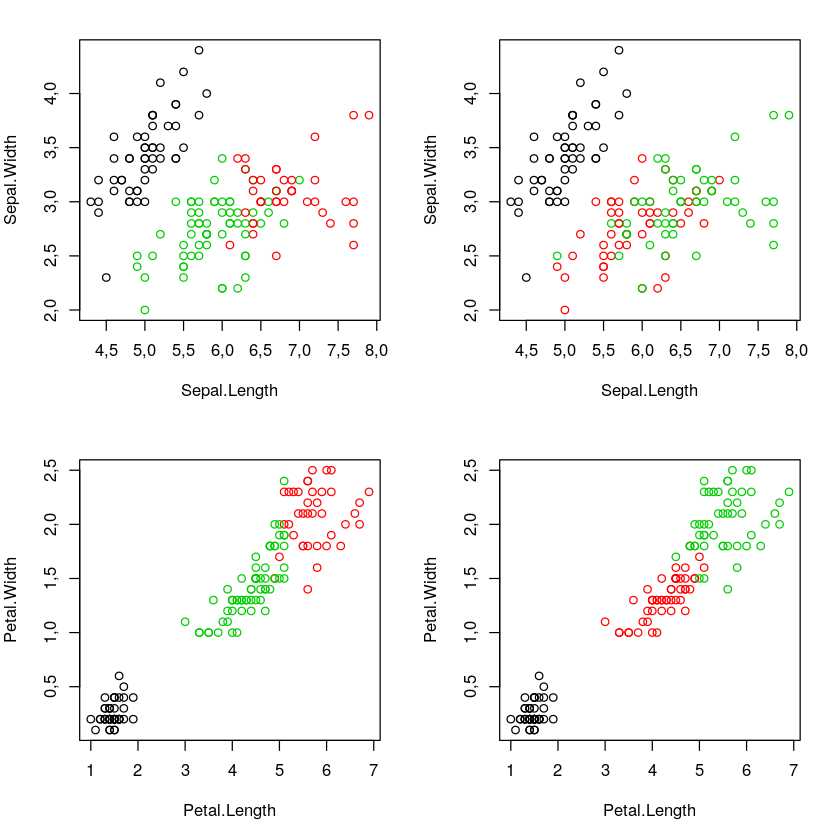

In [45]:
par(mfrow=c(2,2), mar=c(5,4,2,2))
plot(iris.new[c(1,2)], col=result$cluster)# Plot to see how Sepal.Length and Sepal.Width data points have been distributed in clusters
plot(iris.new[c(1,2)], col=iris.class)# Plot to see how Sepal.Length and Sepal.Width data points have been distributed originally as per "class" attribute in dataset
plot(iris.new[c(3,4)], col=result$cluster)# Plot to see how Petal.Length and Petal.Width data points have been distributed in clusters
plot(iris.new[c(3,4)], col=iris.class)

In [47]:
table(result$cluster,iris.class)

   iris.class
    setosa versicolor virginica
  1     50          0         0
  2      0          2        36
  3      0         48        14